## 복습
##### 지난 강의에서 가중치 w를 곱해주어 Liner Model로 wx+b인 퍼셉트론을 배웠다.
##### layer를 쌓아 올려 Neural Network를 만들었고, FC(Fully Connected) layer 앞에 Covolutional layer를 쌓아서 CNN의 구조까지 배웠다.
##### Cl(Convolutional layer) 는 필터로 이미지의 공간 정보들을 가지고 있는 activation map 들을 생성한다.
##### 그렇게 FC층에 넣어 모델을 만들고 optimization을 진행했다.
##### 앞으로 2강 동안은 Training Neural Network에 대해서 배울 것이다.

## 목차
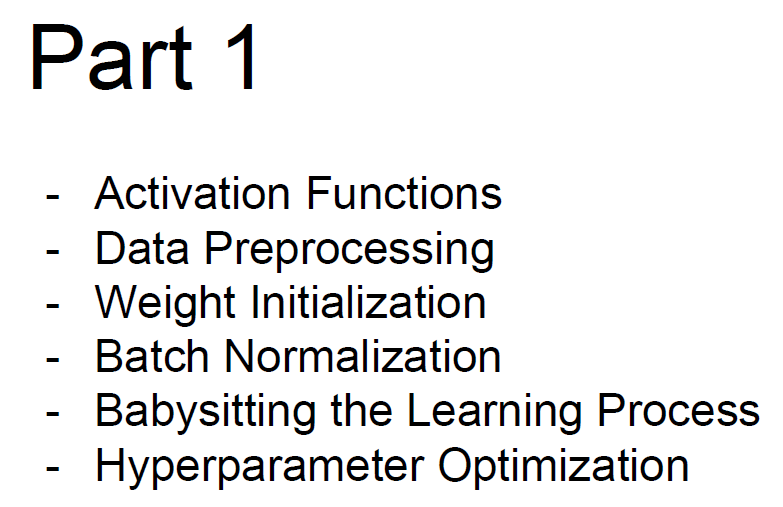

##### 활성화 함수로 시작해 Data preprocessing, weight initialization 순으로 배우는데 가중치 초기화 방법 중에서 batch normalization에 대해 배우게 된다.

## Activation Functions
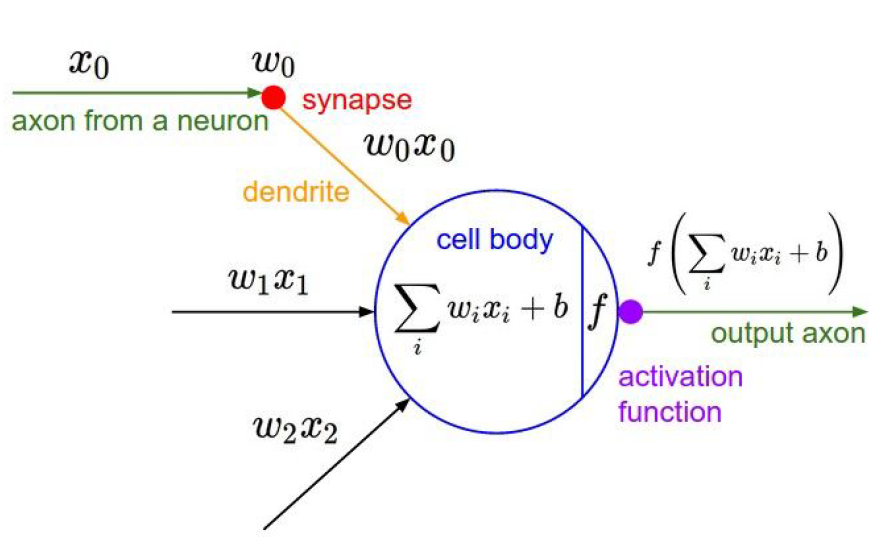

##### activation functions은 딥러닝에 있어서 비선형성을 가해주는 매우 중요한 역할을 한다.
##### activation functions을 넣어주지 않고 layer들만 쌓는 경우 의미가 없다. (즉, single layer와 다름이 없다는 의미)

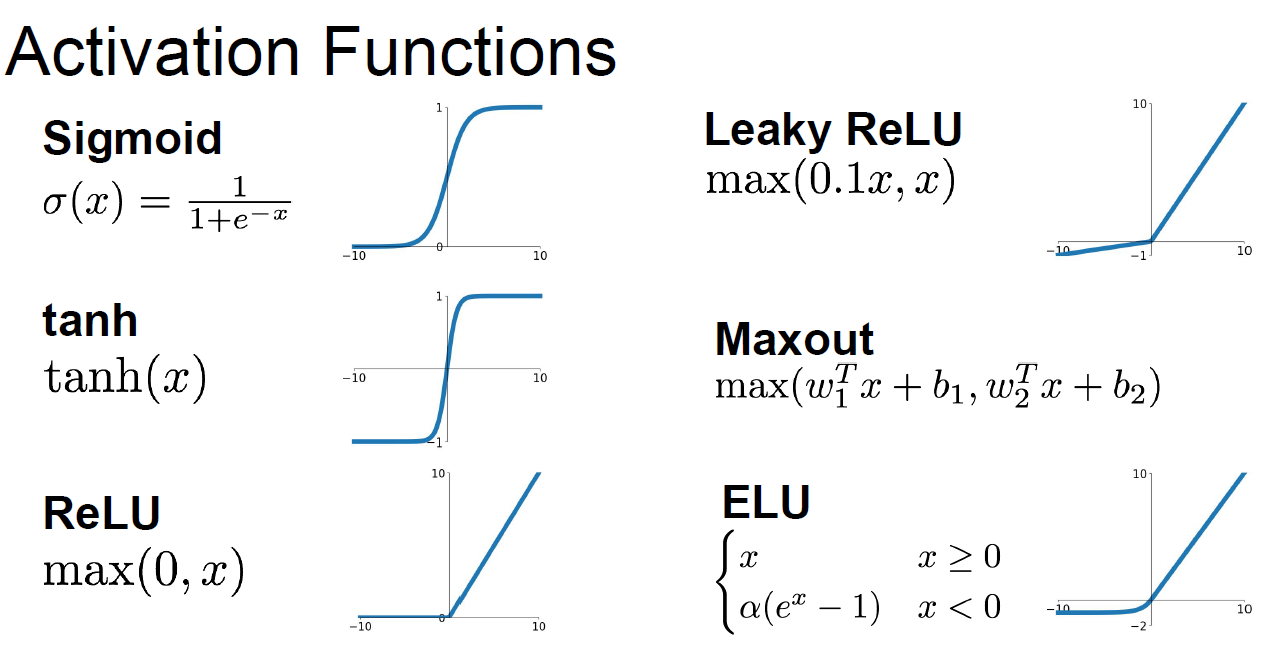

##### Activation functions은 종류가 매우 다양하다. 그리고 그 종류에 따라 값의 형태도 다르다.

### 1. sigmoid
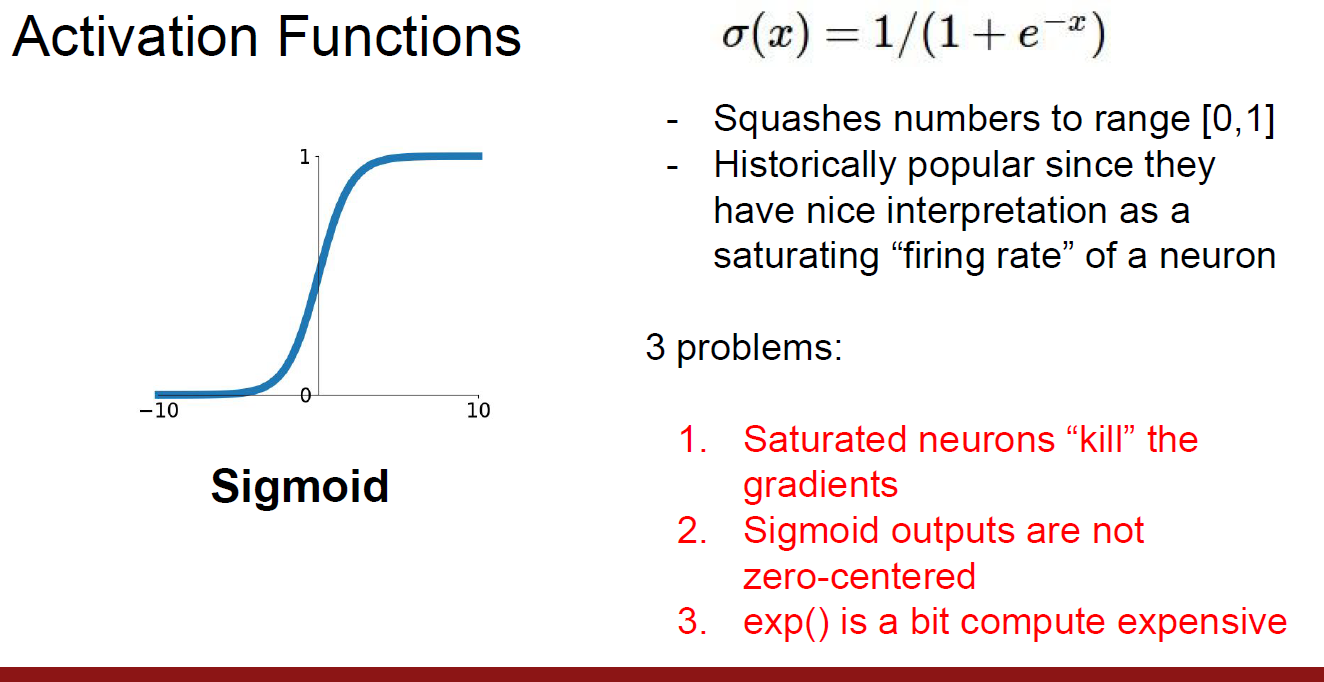

##### wx+b의 liner 함수를 sigmoid 함수에 적용하면, 0~1 값을 가지게 된다. 하지만, sigmoid가 비선형 함수임에도 최근에 활성화 함수로 사용하는 것이 아니고 최종 output낼 때만 사용한다.
##### 왜냐하면 3가지의 문제점이 있기 때문이다.
##### 첫 번째 sigmoid 함수는 gradient를 없애 버린다. ( = vanishing gradient 현상 )
##### backpropagation 과정이 이전의 기울기 값에 계속해서 local gradient를 곱해주는 식인데, 애초에 global gradient가 거의 0이니 모두 0에 수렴에서 기울기가 소실된다. 즉, w가 update 될 수 없다.
##### 두 번째는 zero-center 문제이다.
##### sigmoid를 활성화 함수로 이용하면, 계속해서 양수의 값만이 input 되는 것이다. 모든 값들이 양수이거나 음수가 되는데 그렇다면 지그재그로 가중치가 update 되기 때문에 굉장히 비효율적이다.
##### 세 번째는 exp의 연산은 고비용이다.

### 2. tanh
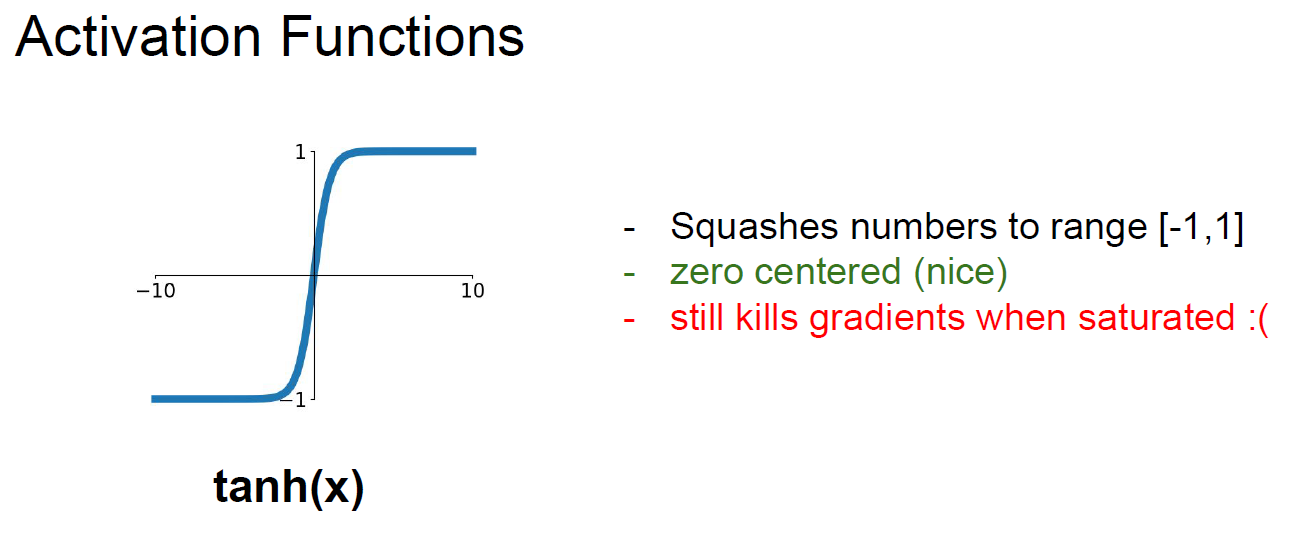

##### 하이퍼볼릭 탄젠트(tanh) 함수는 sigmoid 함수와 유사하지만 도출 값이 1, -1로 확장되어 zero-centerd 문제를 해결했지만 vanishing gradient 문제를 해결하지 못했다.

### 3. ReLU
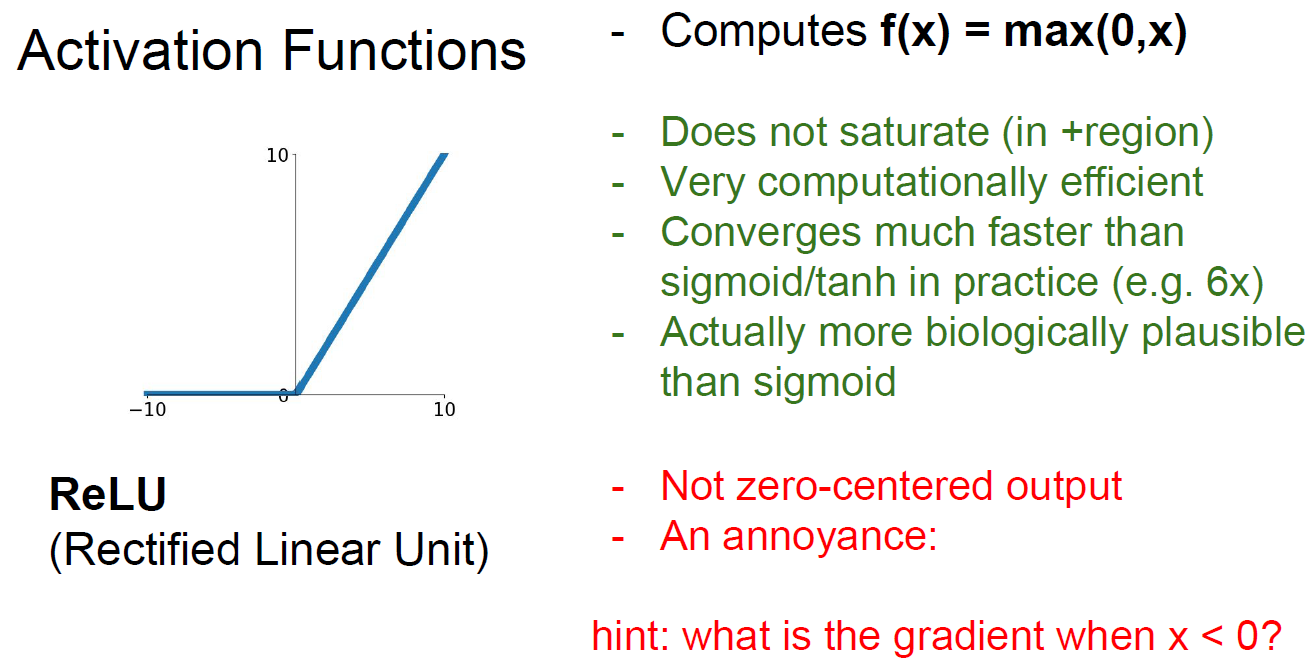

##### ReLU 함수는 layer를 쌓아갈 때 f(x)=max(0, x) 식을 사용한다.
##### 양의 방향에서 입력값 x를 그대로 배출하기 때문에 vanishing gradient 문제를 어느 정도 해결했지만, 입력 값의 음의 부분을 전부 0으로 두기 때문에 완전히 해결하지 못했고 zero-centered output이 여전히 문제다.
##### ReLU를 활성화 함수로 한 모델을 훈련 도중에 network의 일부가 freeze 되는데, 이를 dead relu에 빠진 것이라고 한다. 10~20%이기 때문에 학습은 잘 된다.
##### sigmoid에 비해서 vanishing gradient 문제가 현저히 적어서 일반적으로 사용한다.

### 4. Leaky ReLU
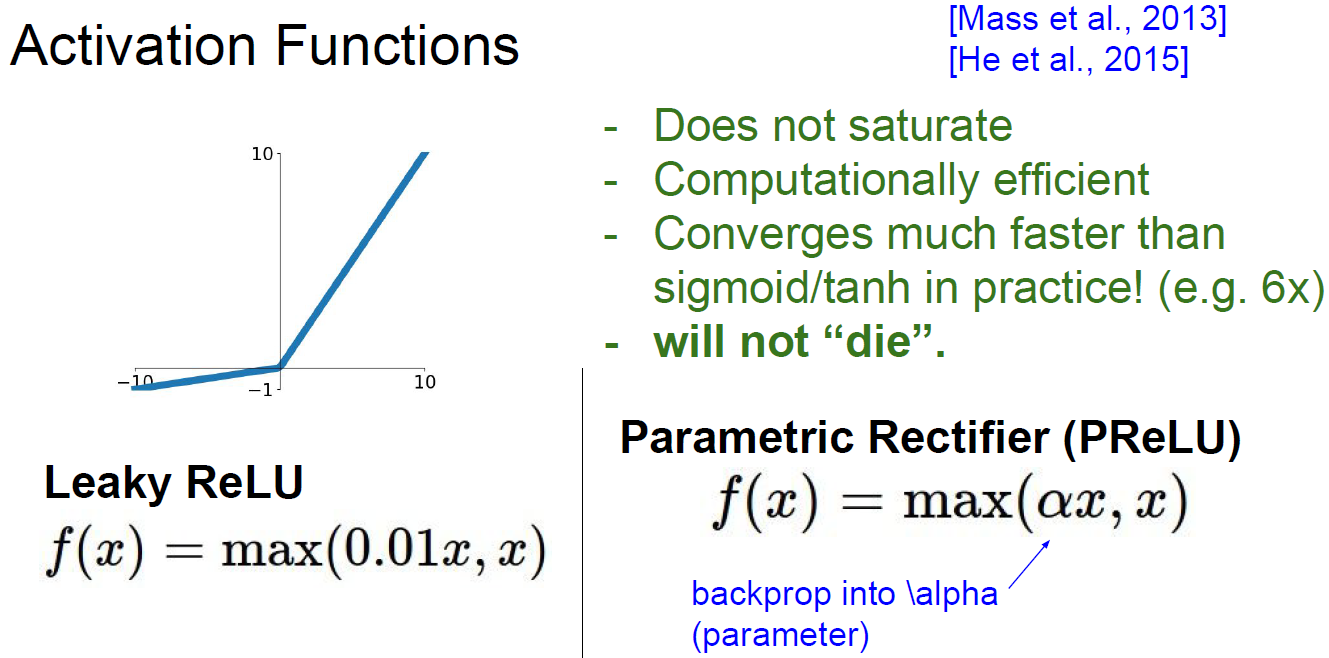

##### Leaky ReLU는 기존 relu 함수의 효율성과 함께 dead relu의 단점을 보완한 함수이다.
##### 음의 영역에도 경미하게 기울기를 주어 vanishing gradient 문제점을 해결했다.

### 5. Exponential Linear Units(ELU)
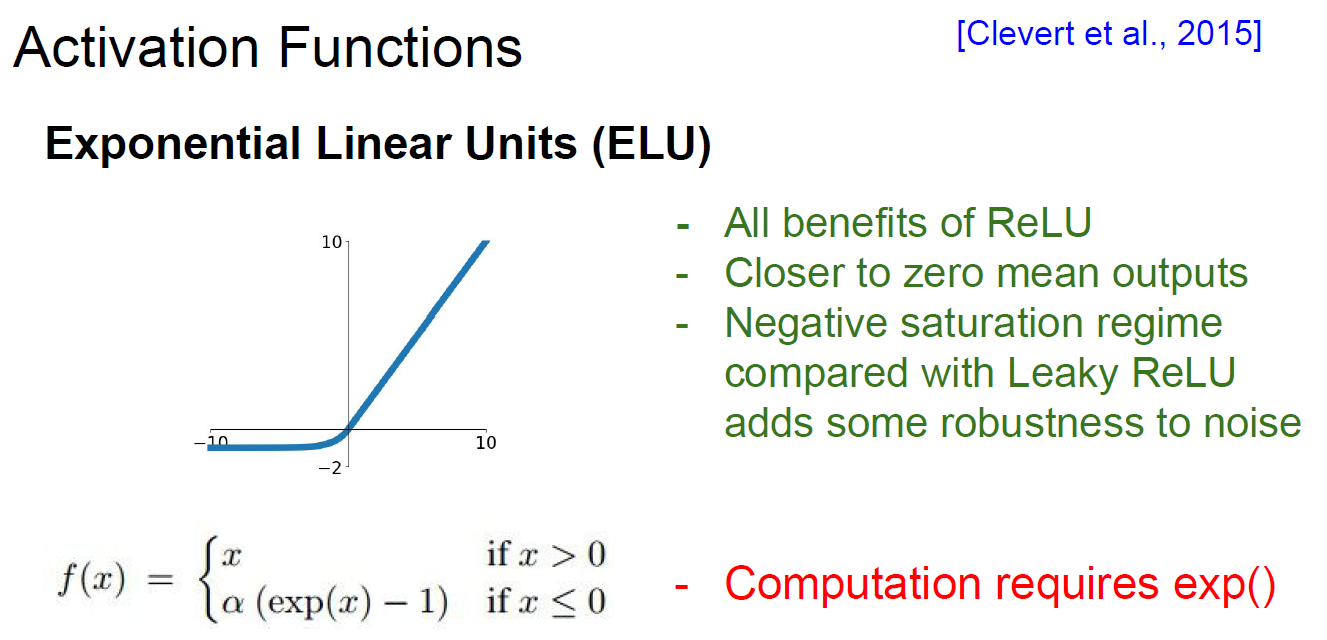

##### 0에서의 미분 불가점을 미분 가능하게 SMOOTH 시킨 함수이다. 노이즈에 더욱 로버스트하다.
##### 하지만, 음의 영역에서 기울기가 소실된다는 단점이 있고, exp 연산으로 인하여 앞선 ReLU 연산들보다 떨어진다.
##### ReLU 함수와 Leaky ReLu 함수 사이 함수라고 생각하면 된다.

### 6. Maxout Neuron
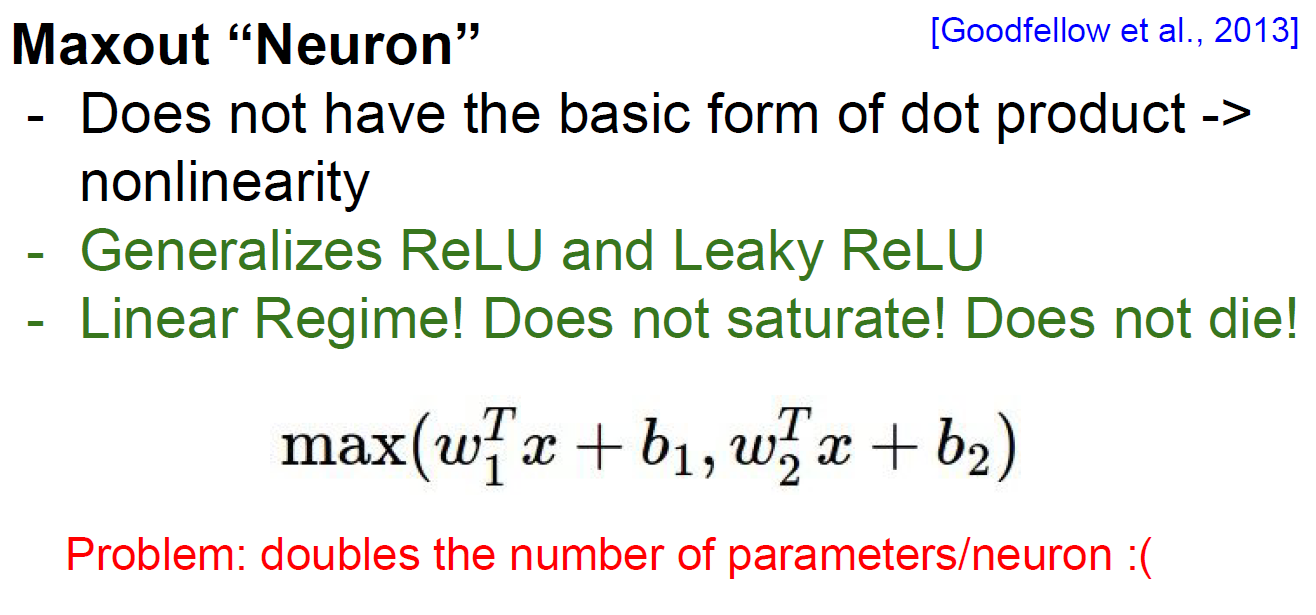

##### 파라미터를 더 두어서 각각 출력 값이 다른 함수 2개 중에 max 값을 취하는 함수이다.
##### maxout은 기울기가 사라지는 문제점은 없지만, 연산량이 2배가 된다.

### activation functions 정리
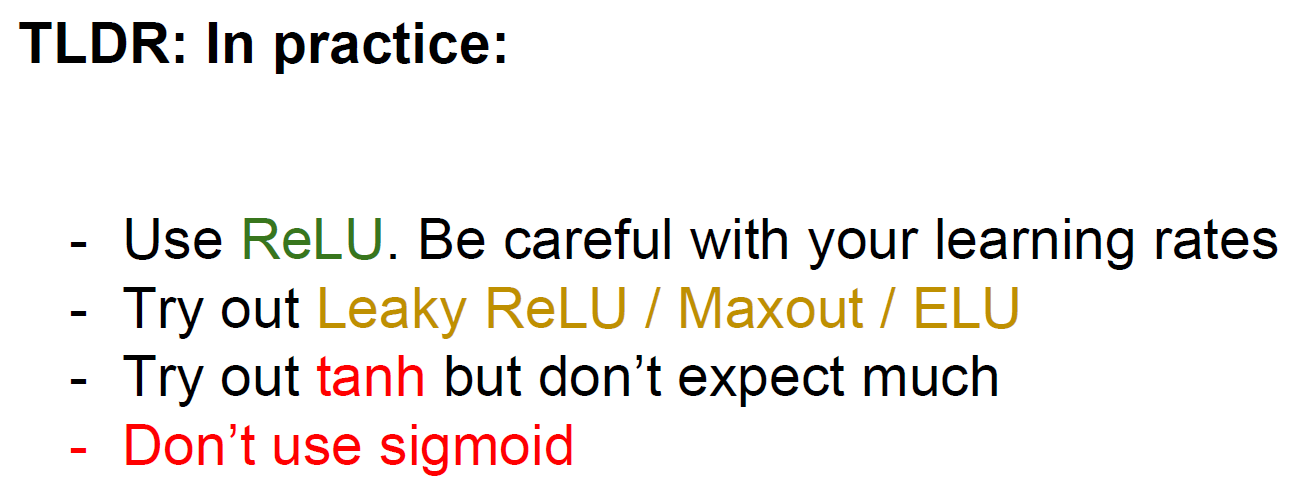

## Data preprocessing
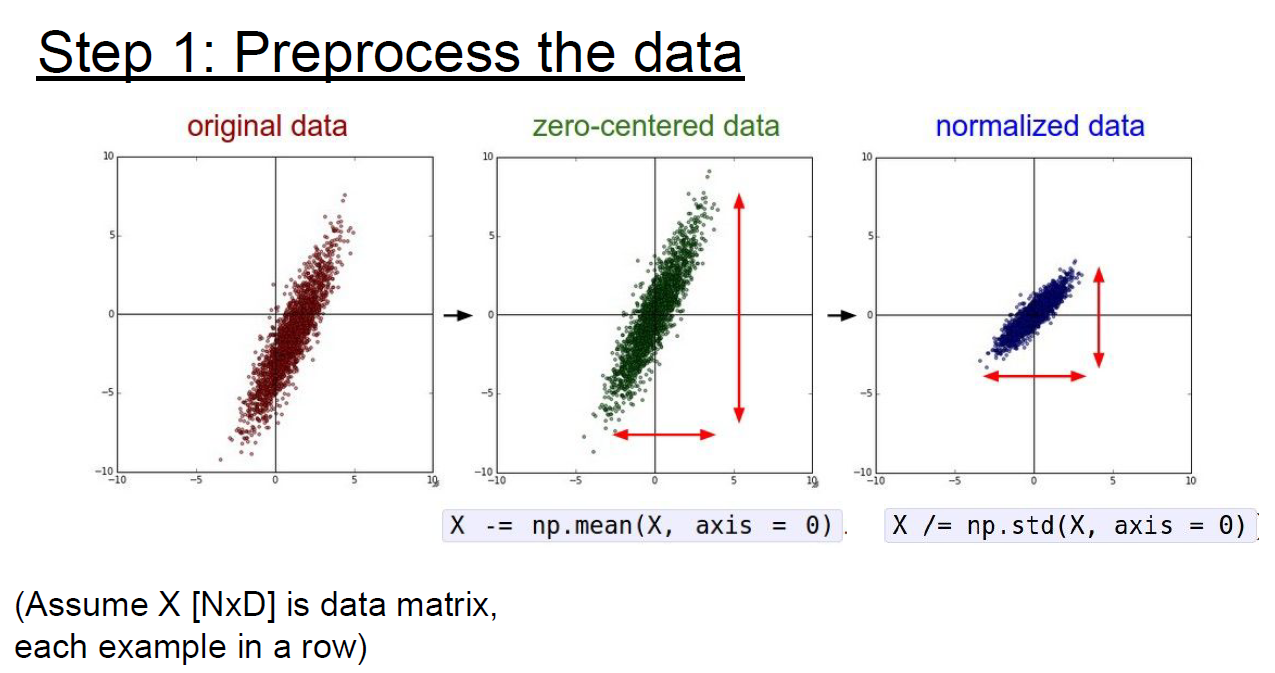

##### 일반적으로 zero - centering과 normalize가 있는데, 이미지 데이터에서는 zero - centering만 해준다. (이유는 이미지 데이터는 픽셀 값이 0~255인 같은 범위기 때문이다.)

##### zero - centering 하는 이유는 연산의 비효율성을 개선하기 위함이다.
##### zero-mean으로 전처리를 진행하는데, 해당 방법으로는 문제를 완전히 해결을 불가능하다. 오직 첫 layer에서만 zero - centering 되고, layer가 깊어질수록 활성화 함수의 output으로 양수가 나오므로 첫 layer 정도만 의미가 있다.

##### 전처리 방법으로는 PCA나 whitening 기법들이 있는데, 이미지 데이터에서는 단순히 zero-mean 정도만 한다.
##### 왜나하면 우리는 이미지 데이터를 저차원의 새로운 피처들로 이뤄서 학습을 진행하는 것이 아니라, Cl에서 오리지널의 이미지 데이터를 필터 등으로 공간적인 구조로 바라봐 함을 알기 때문이다.
##### 그리고, train 셋과 test 셋을 전처리 할 때 동일한 mean을 이용하여 zero-mean을 해준다. 여기서 mean 값을 이미지의 전체 데이터로 할지, 각각 독립된 채널마다의 mean으로 이용할지 선택할 수 있는데 큰 차이가 나지 않는다.

## Weight Initalization
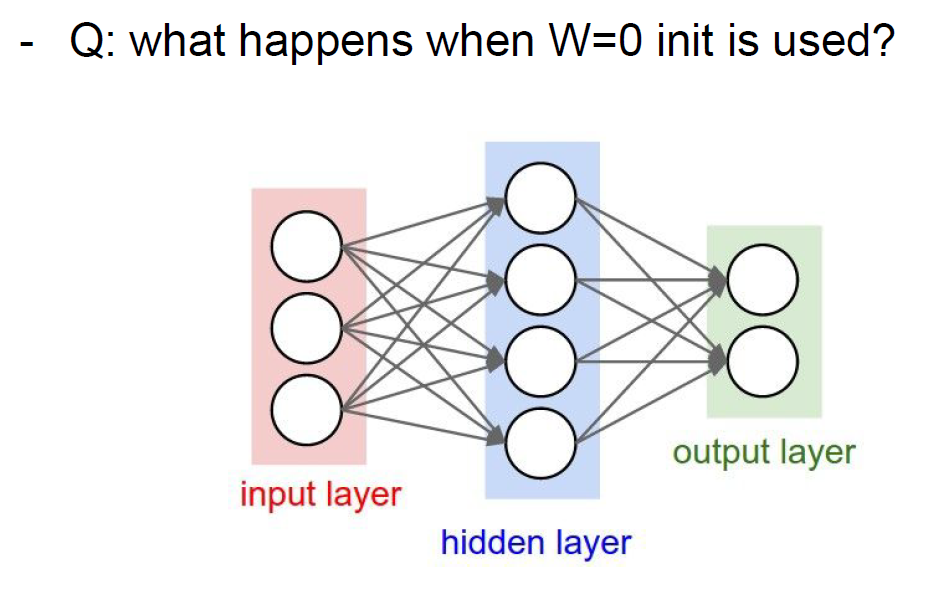

##### 가중치 초기화는 중요한 개념이다.
##### 만약 weight를 모두 0으로 맞추면 뉴런이 죽는게 아니고 전부 똑같이 수행된다. 즉, 활성화 함수가 작동하지 않으니 layer가 의미 없어지는 상황이다.

##### 생각해볼 수 있는 첫 번째 idea는 맨 처음 w에 아주 작은 랜덤의 값을 부여하는 것이다.
##### w initialization에서 임의의 작은 값들을 랜덤하게 주니 layer가 깊어질수록 0으로 수렴되고 gradient 값도 엄청나게 작아지니 update가 잘 수행되지 않는다.
##### initialization이 w를 작게하면 collapse가 되고, 너무 크게하면 saturate 되기 때문에 매우 어려운 것이다.
##### 그렇다면 입력 값의 수에 따라 상대적으로 w를 조정해보는 방법은 어떠한가?
##### 입력값들의 수가 적으면 큰 값의 w가 필요하니 더 적은 수로 나누어 스케일링해주고, 반대로 입력값들의 수가 많으면 작은 값의 w가 필요해서 큰 수로 나누어 스케일링 하는 것이다.

## Batch Normalization
##### 우리가 원하는 가우시안의 범위 내에서 activation 값들을 뽑고 싶은 idea에서 기인한 방식이다.
##### 현재 batch에서 평균과 분산을 이용해서 훈련 처음부터 batch normalization을 취해주어 모든 층에서 정규 분포를 따르게끔 하는 것이다.

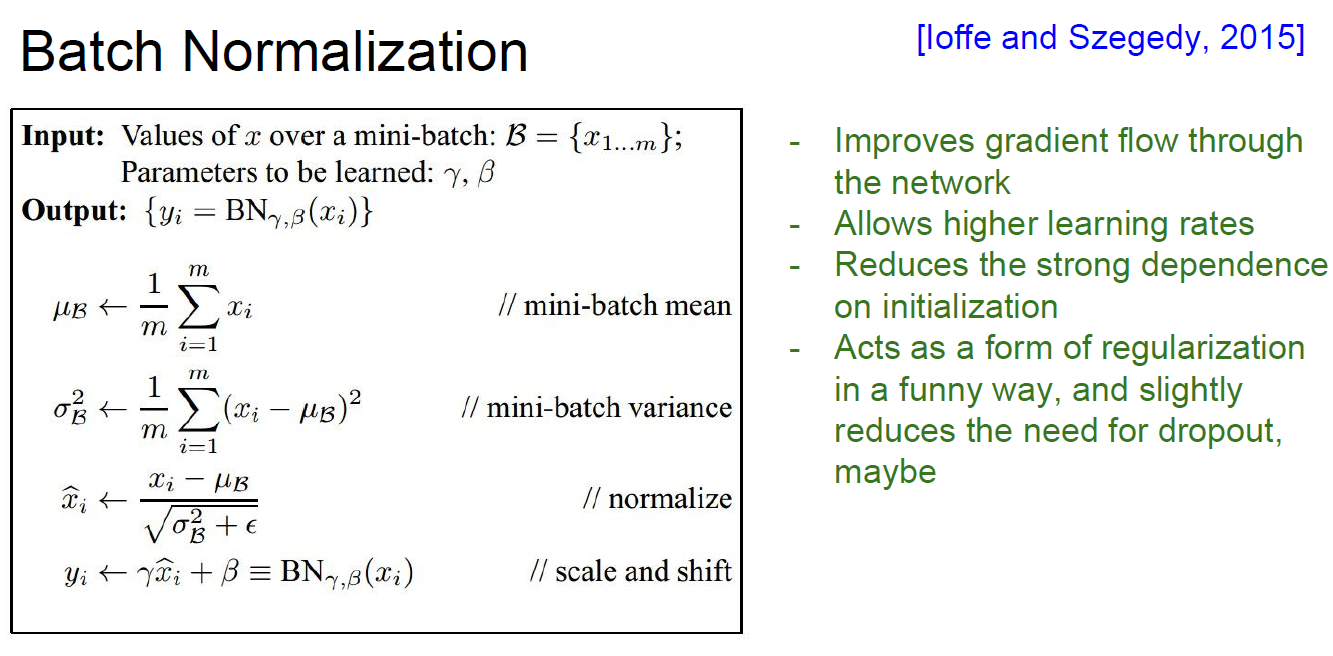

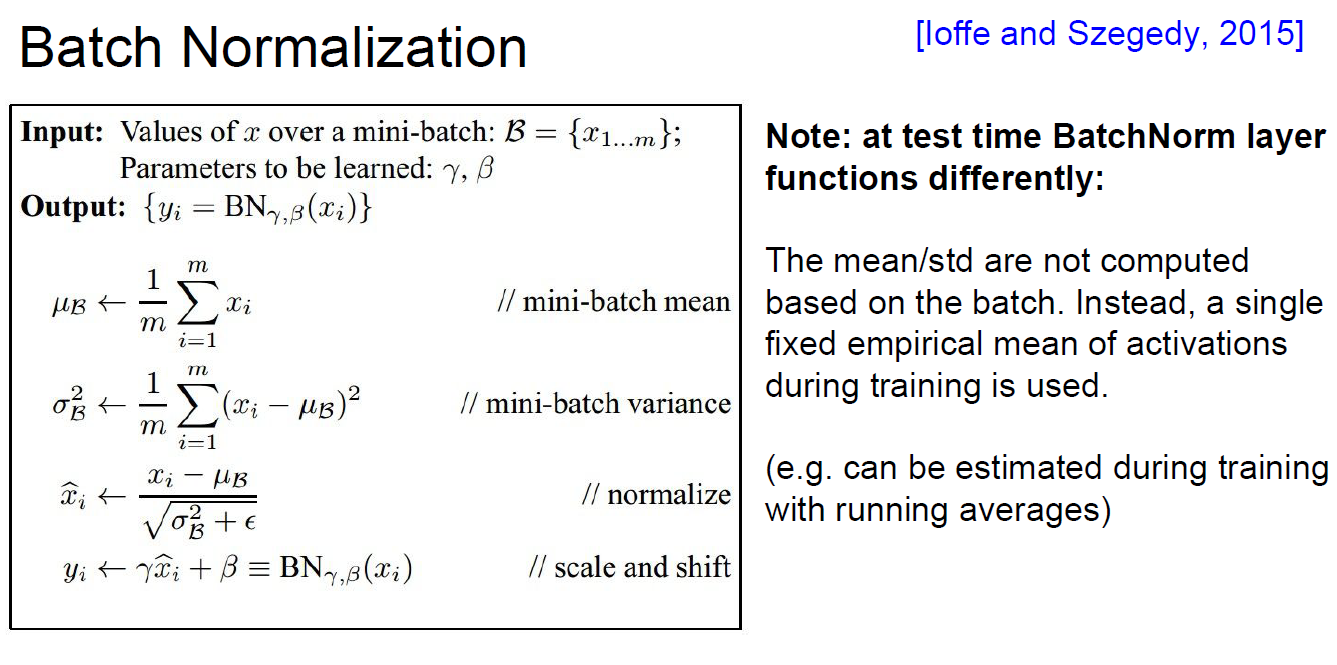

##### batch normalization를 정리해보면 아래와 같다.


*   mini-batch 마다 mean, variance를 계산한다.
*   구한 mean과 variance로 normalize를 해준다.
*   scailing과 shifting factor를 갖고 있는다.

##### 해당 기법이 기울기의 흐름에 좋은 영향을 주어, 더욱 robust한 결과를 이끌어 낸다.
##### learning-rate의 범위를 더욱 확장할 수 있고, 많고 다양한 initialization을 유도하는 효과도 있어서 batch norm은 매우 중요하다.
##### input 값인 x에 normalization 해줌으로써 평균과 분산에도 영향력이 가해지기 때문에 일종의 regularization 효과도 있다.
##### test셋에서 batch norm 할 때에는 train 셋에서 이용한 mean과 variance를 이용한다.





## Babysitting the Learning Process
##### Babysitting the Learning Processs에서는 network architecture를 구성하고, 학습과정을 어떤 시각으로 바라봐야 하는지와 하이퍼 파라미터를 어떻게 조정하는지 전체적인 프레임을 살펴본다.



*   데이터 전처리 수행
*   network architecture 구성
*   loss 함수를 지정하거나 regularization
*   학습을 수행하는데, Sanity Check 먼저 진행 (train 셋에서 일부만 가져와서 시작하는데 과적합이 되면 학습이 잘 되는 것으로 판단)
*   전체 데이터를 학습 시키고, loss를 확인하면서 learning-rate 조정한다.








## Hyperparameter Optimization
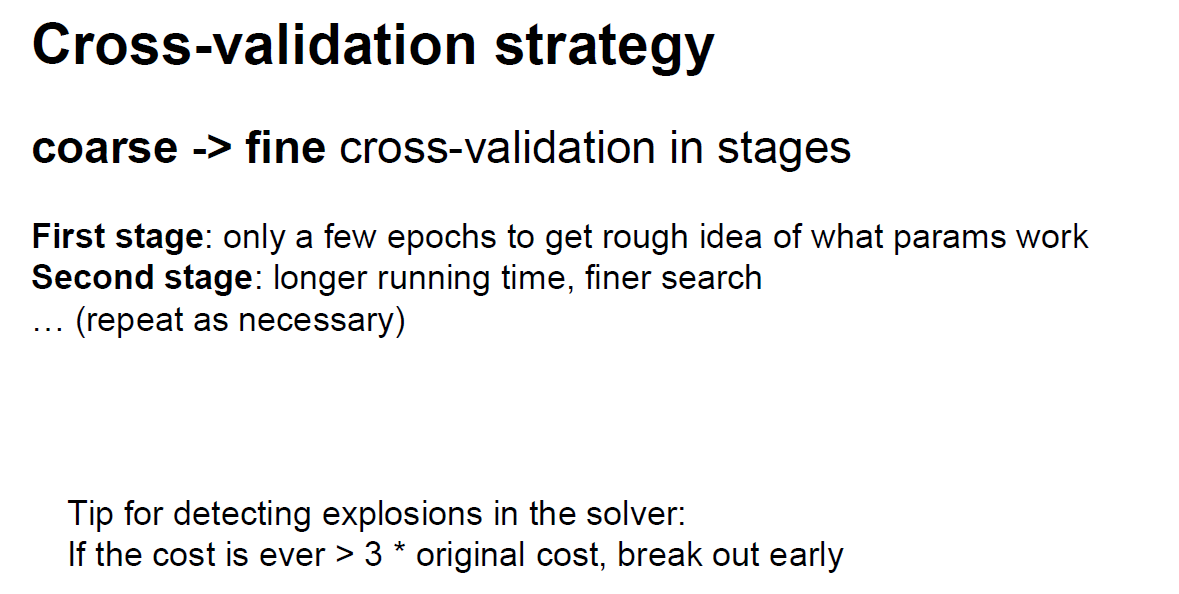

##### 가장 먼저 Cross-validation이 있다.
##### CV 기법으로 넓은 범위에서 좁은 범위로 좁혀가며 하이퍼 파라미터를 세팅한다.

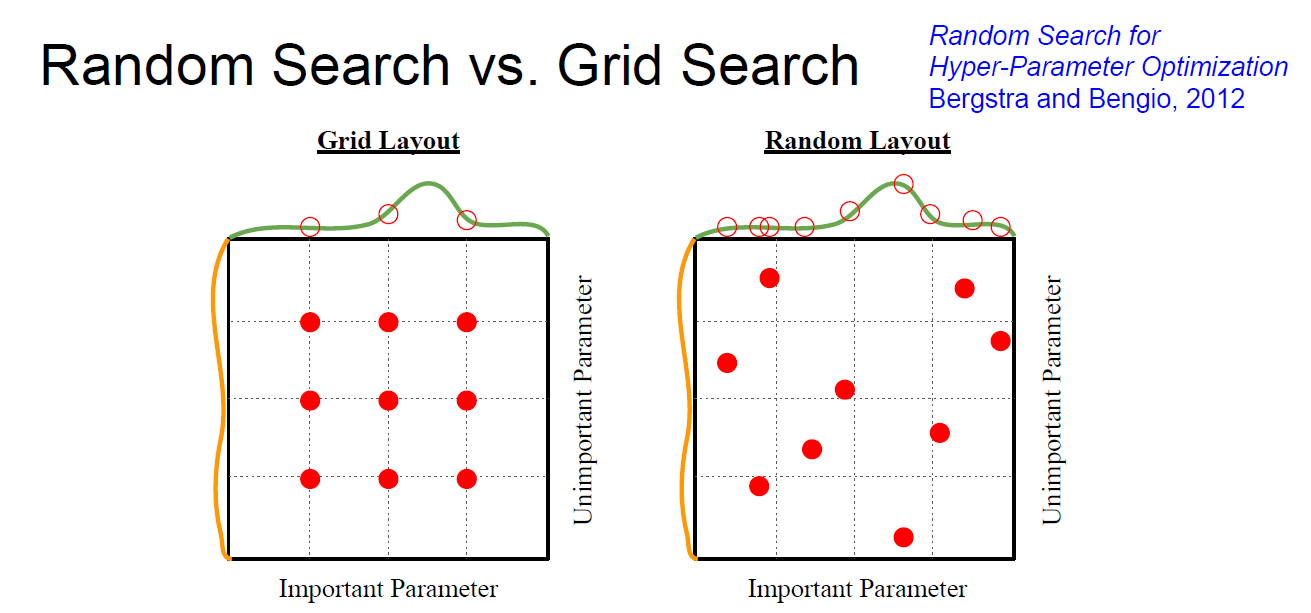

##### Grid Search와 Random search 방식이다. -> 하이퍼 파라미터들의 값들을 조합을 고정시켜서 좋은 조합을 뽑는 방식이다. Random Search 방식이 더 좋다.
##### 분명 변수들 사이에서도 중요도가 있을 테지만, Grid search는 이를 무시한 채로 search하기 때문이다.

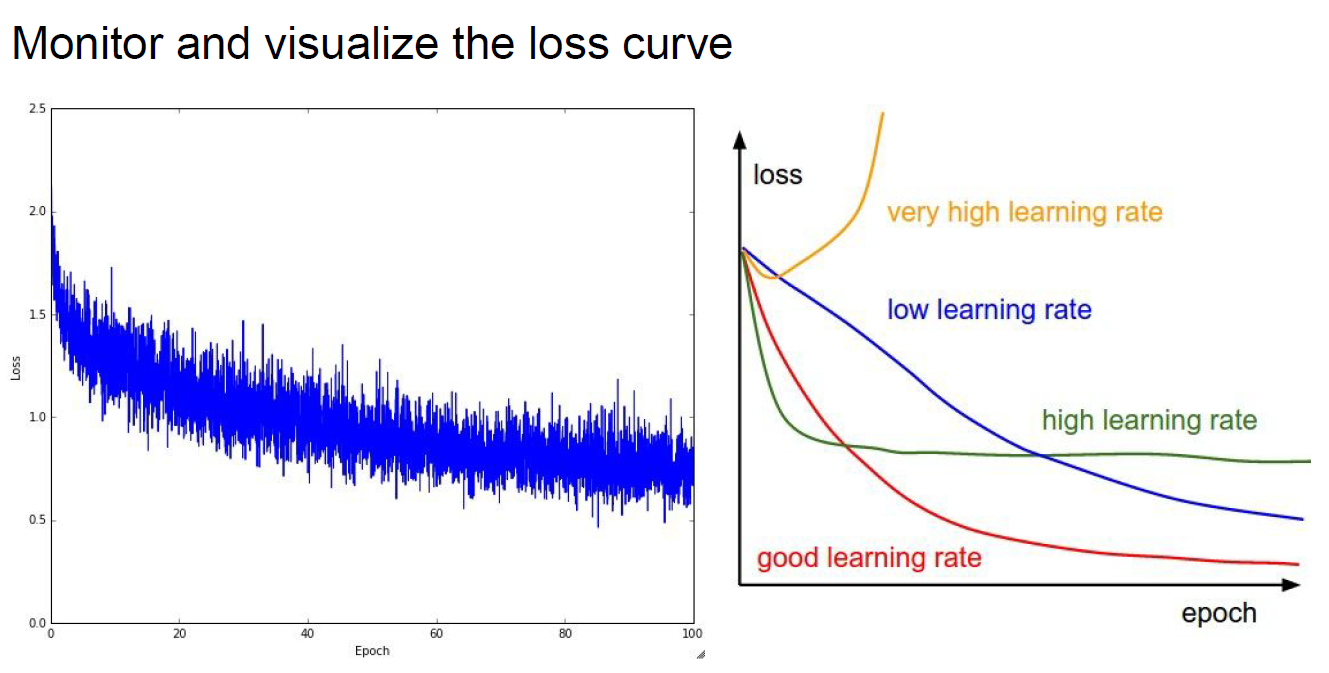

##### 위 loss 그래프를 보면, lr 값은 update의 속도와 방향의 정확도를 전부 겸비한 빨간색의 그래프가 제일 좋다.

## Summary
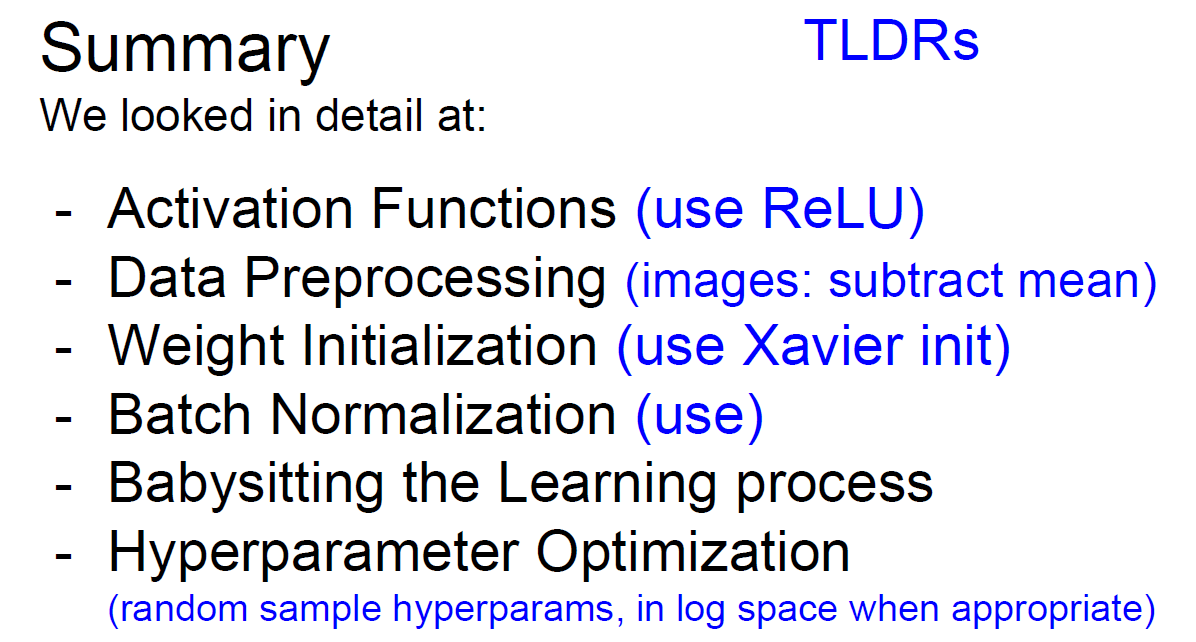